# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

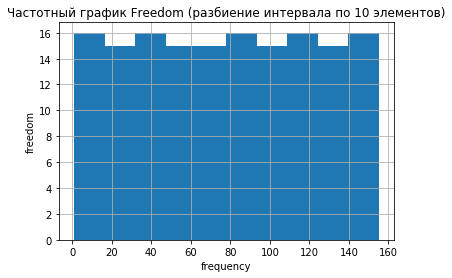

In [5]:
freedom = plt.hist(df['Freedom'], 10)

plt.xlabel('frequency')
plt.ylabel('freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

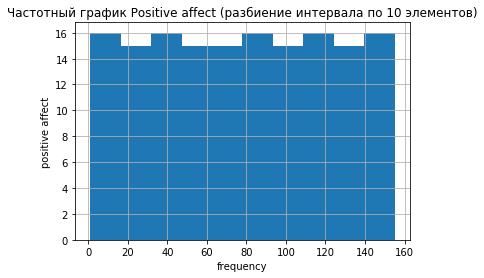

In [6]:
positive_affect = plt.hist(df['Positive affect'], 10)

plt.xlabel('frequency')
plt.ylabel('positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Частотные графики показателей Freedom и ЧPositive affect указывают на равномерное распределение значений.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [22]:
# Согласно информации по датафрейму в колонке Freedom есть одно значение Nan. Уберем строку с таким значеинем.
df_1 = df.dropna(subset=['Freedom'])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           155 non-null object
Ladder                     155 non-null int64
SD of Ladder               155 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      151 non-null float64
Healthy life
expectancy    149 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.5+ KB


In [23]:
# медиана
statistics.median(df_1['Freedom'])

78.0

In [24]:
# мода
freedom = df_1['Freedom']
statistics.mode(freedom)

StatisticsError: no unique mode; found 155 equally common values

In [30]:
# Значение моды отсутствует, т.к. все значения колонки Freedom уникальные 
# (видимо, это какая-то ранжированная оценка страны). Проверим
len(df_1['Freedom'].unique())

155

In [25]:
# математическое ожиание
statistics.mean(freedom)

78.0

In [32]:
# станартное отклонение
statistics.pstdev(freedom)

44.74371464239419

In [33]:
# дисперсия
statistics.pvariance(freedom)

2002.0

In [35]:
# минимум и максимум и размах
min(freedom), max(freedom), max(freedom) - min(freedom)

(1.0, 155.0, 154.0)

In [ ]:
# найти выбросы (если есть)
# Ранее была удалена строка с мусорным начением NaN. Также было опрделено, 
# что все оставшиеся строки с уникальными показателями от 1 до 155, т.е. выбросы далее искать не имеет смысла.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

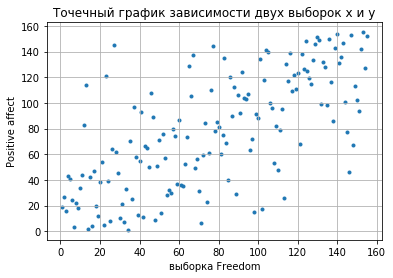

In [42]:
# график
freedom = df_1['Freedom']
positive_affect = df_1['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [ ]:
# на графике видная прямая линейная зависимость между признаками

In [43]:
# расчет коэффициента Пирсона
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
corr

0.6817698430601656

In [ ]:
# коэффициент Пирсона положительный, значит зависимость между признаками прямая.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [44]:
# центрируемю freedom_1 
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [45]:
# масштабируем. freedom_2 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

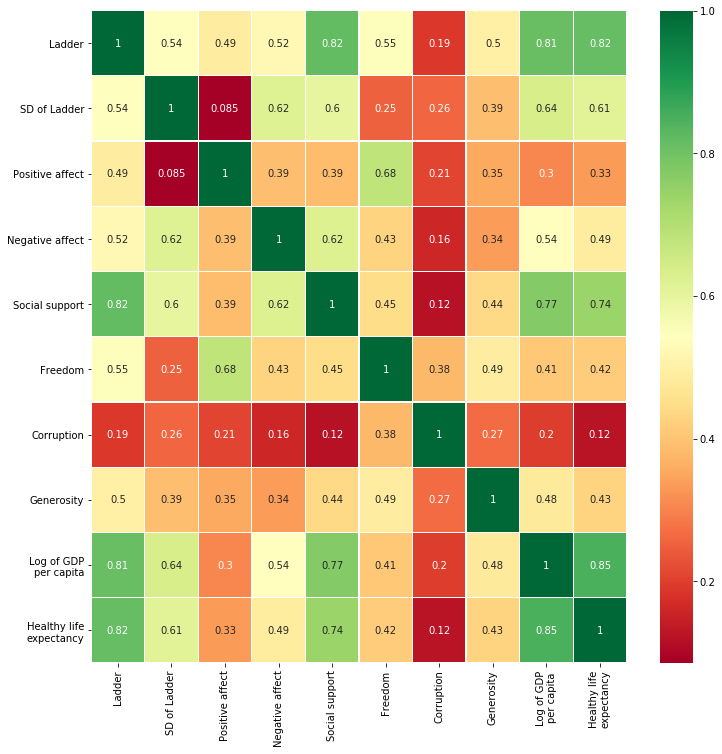

In [46]:
import seaborn as sns
sns.heatmap(df_1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [47]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Сделать частотный график колонки AveragePrice. Какое это распределение?

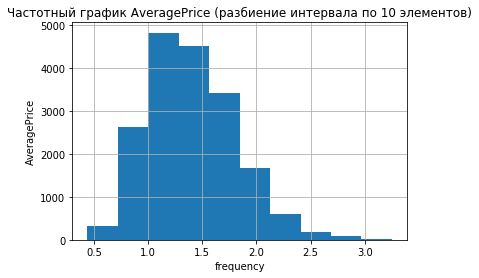

In [50]:
AveragePrice = plt.hist(df['AveragePrice'], 10)

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

In [ ]:
# По частотному графику видим, что распределение значений нормальное.

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [54]:
sold = df['4046']
AveragePrice = df['AveragePrice']
corr, p_value = pearsonr(AveragePrice, sold)
corr

-0.20831704848788477

In [ ]:
# данный вид авокадо практически не вляет на среднюю стоимость.